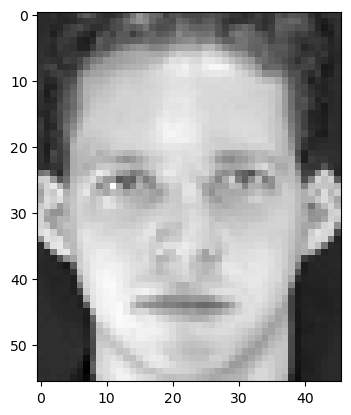

In [3]:

# HW9-2. PCA 응용 – eigenface & 얼굴인식
#%% 이미지 불러오기
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob

img = Image.open('./faces/s1_1.png')
img_gray = img.convert("L")
img_gray=np.array(img_gray)
img_gray.shape #(56,46)
plt.imshow(img_gray, 'gray')
plt.show()


In [4]:

person_idxs = [i for i in range(1, 41)]
person_nums = dict()
train_imgs = []
test_imgs = []


In [5]:

for p in person_idxs:
    file_paths = glob.glob(f'./faces/s{p}_*.png')
    person_nums[p] = len(file_paths) - 1
    for i, file_path in enumerate(file_paths) :
        img = Image.open(file_path)
        img_gray = img.convert("L")
        img_gray=np.array(img_gray)
        if i == 1 :
            test_imgs.append(img_gray)
        else :
            train_imgs.append(img_gray)

In [6]:
print("train image size", len(train_imgs))
print("test image size", len(test_imgs))
print("사람 id별 train data 갯수\n", person_nums)

train image size 360
test image size 40
사람 id별 train data 갯수
 {1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9, 10: 9, 11: 9, 12: 9, 13: 9, 14: 9, 15: 9, 16: 9, 17: 9, 18: 9, 19: 9, 20: 9, 21: 9, 22: 9, 23: 9, 24: 9, 25: 9, 26: 9, 27: 9, 28: 9, 29: 9, 30: 9, 31: 9, 32: 9, 33: 9, 34: 9, 35: 9, 36: 9, 37: 9, 38: 9, 39: 9, 40: 9}


In [7]:
# 1. 각 얼굴 이미지는 56x46 = 2,576차원 데이터로 생각할 수 있다. 각 사람의 첫번째 이
# 미지(j=1)를 제외한 나머지 이미지들(총 360장)에 대해 PCA를 적용하여 가장
# dominant한 주성분 벡터 10개를 구하고, 이들을 이미지로 도시하시오(visualization).
#1-1) 주성분 벡터 구하기
train_data = np.array(train_imgs)
img_nums, img_h, img_w =  train_data.shape #(360, 56, 46)
train_data = train_data.reshape(img_nums, -1).T
train_data.shape #(2576, 360)


(2576, 360)

In [8]:

#공분산 행렬
train_cov = np.cov(train_data)
train_cov.shape #(2576, 2576)


(2576, 2576)

In [9]:

#고유분해
V, D, V_t = np.linalg.svd(train_cov)
print("고유벡터\n", V)
print("고유값\n", D)

고유벡터
 [[-4.72186330e-03 -2.85126543e-02 -4.11793184e-02 ... -3.22027761e-03
   1.08612863e-01 -1.17450718e-04]
 [-4.88033481e-03 -2.85303084e-02 -4.11563795e-02 ...  2.23045168e-02
   1.03705820e-01 -3.43707333e-02]
 [-4.19327068e-03 -2.87418394e-02 -4.13474658e-02 ...  1.74203196e-02
  -2.94584794e-02 -4.66157169e-02]
 ...
 [-1.45350904e-02  1.37850035e-02 -2.35423577e-02 ... -1.53898202e-02
  -8.06469709e-05  1.00188249e-02]
 [-1.29540198e-02  1.90729104e-02 -2.74237248e-02 ... -2.06007605e-02
   8.82328583e-03 -2.47343294e-02]
 [-1.37327814e-02  1.90273066e-02 -2.85067657e-02 ...  6.97943098e-03
  -1.61111045e-02 -6.84877466e-03]]
고유값
 [6.96315556e+05 5.25755799e+05 2.75433312e+05 ... 3.52057304e-11
 1.49242247e-11 1.38744351e-11]


In [10]:
#1-2) 주성분 벡터 10개 시각화
#주성분 벡터 10개
top = 10
top_eigen_vecs = V[:, :top]
top_eigen_vecs.shape #(2576, 10)
top_eigen_vec_imgs = top_eigen_vecs.T.reshape(top, img_h, img_w)
top_eigen_vec_imgs.shape #(10, 56, 46)


(10, 56, 46)

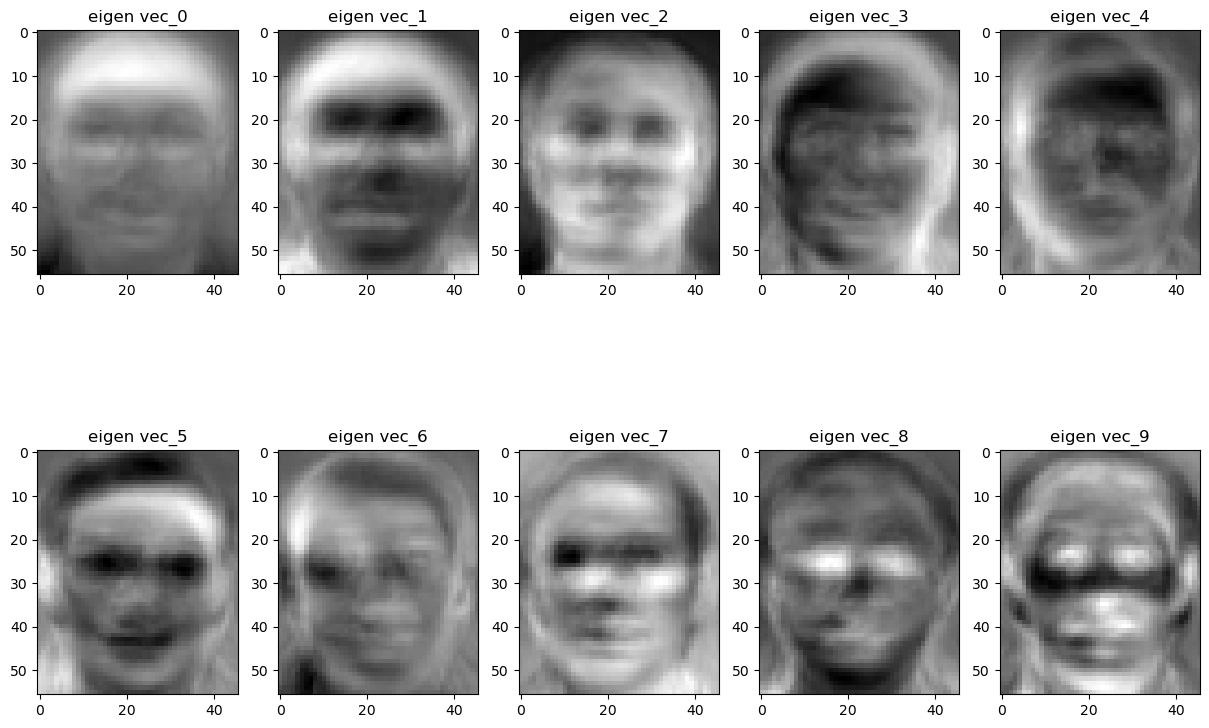

In [11]:

plt.figure(figsize=(15, 10))
rows, cols = 2, 5
for i in range(top) :
    title = f'eigen vec_{i}'
    plt.subplot(rows, cols, i+1)
    plt.title(title)
    plt.imshow(top_eigen_vec_imgs[i],'gray')

plt.show()

In [12]:
# 2. 40명의 사람 중 한 명을 자유롭게 선택한 후, 해당 사람의 첫번째 이미지를 앞서 구한
# 주성분 벡터 k개를 이용하여 근사하고(reconstruction) 그 결과를 이미지로 도시하시
# 오. 단, k = 1, 10, 100, 200 각각에 대해.

#2-1) 테스트 이미지 선정
test_data = np.array(test_imgs)
img_nums, img_h, img_w =  test_data.shape # (40, 56, 46)
test_data = test_data.reshape(img_nums, -1).T
print(test_data.shape) #(2576, 40)
img_idx = np.random.randint(0, img_nums)
test_data = test_data[:, img_idx]

(2576, 40)


In [13]:

#2-2) k에 따른 test 이미지 근사
k_list = [1, 10, 100, 200, 1000]
k_eigen_vecs = [V[:, :k] for k in k_list]
pca_imgs_data = [eigen_vecs.T @ test_data for eigen_vecs in k_eigen_vecs]
recover_img_data = [eigen_v @ pca_img for eigen_v, pca_img in zip(k_eigen_vecs, pca_imgs_data)]


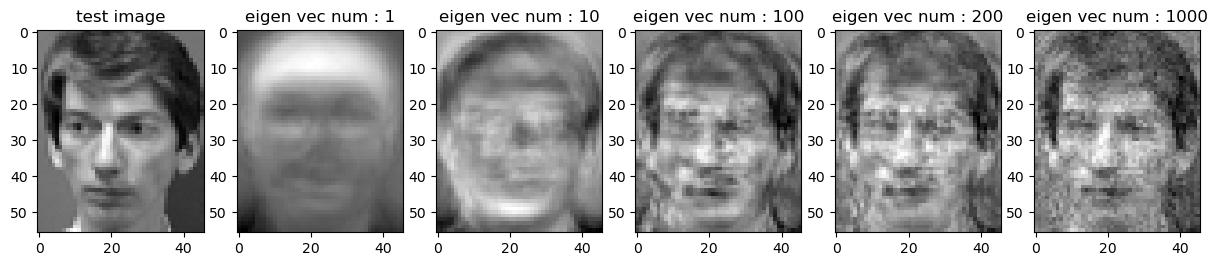

In [14]:

plt.figure(figsize=(15, 10))
#이미지 원본
title = f'test image'
rows, cols = 1, len(k_list) + 1
plt.subplot(rows, cols, 1)
plt.title(title)
plt.imshow(test_imgs[img_idx],'gray')
#reconstruction image
for i in range(len(k_list)):
    title = f'eigen vec num : {k_list[i]}'
    plt.subplot(rows, cols, i+2)
    plt.title(title)
    plt.imshow(recover_img_data[i].reshape(img_h, img_w),'gray')
plt.show()

In [15]:
# 3. 각 사람의 첫 번째 이미지를 입력하면, 해당 이미지가 DB에 있는 사람 중 누구인지를
# 인식하는 프로그램을 작성하고 인식 성능을 평가하시오(각 이미지를 k개의 dominant
# 한 주성분벡터들로 구성되는 부분공간에 투영한 좌표(feature vector)를 구하고, 테스
# 트 이미지의 투영좌표와 DB에 있는 이미지의 투영좌표를 비교).

k = 300 #K=300에서 사람의 윤곽이 어느 정도 구별됨
eigen_vecs = V[:, :k]
eigen_vecs.shape #(2576, 300)
train_data.shape #(2576, 360)
train_data_pca = eigen_vecs.T @ train_data
train_data_pca.shape #(300, 360)

print(f"{k}개 일때 분산 비율", D[:k].sum() / D.sum() * 100) #99.6%의 분산비율을 갖음


300개 일때 분산 비율 99.57881675669907


In [16]:
#3-1) 부분 공간에 투영한 이미지 데이터들의 사람 idx별 평균값
person_mean_feature = []
start = 0
end = 0
for idx in person_idxs :
    end += person_nums[idx]
    person_mean_feature.append(train_data_pca[:, start:end].mean(axis=1))
    start = end
    # print(f"person_idx {idx} : data shape", person_mean_feature[-1].shape)

In [17]:
#3-2) 각 사람의 평균 feature를 복원하여 시각화
recons_train_data = [eigen_vecs @ feature for feature in person_mean_feature]
recons_train_data

plt.figure(figsize=(15, 25))
cols = 6
rows = len(recons_train_data)*2 // cols if len(recons_train_data)*2 % cols == 0 else  len(recons_train_data)*2 // cols + 1


<Figure size 1500x2500 with 0 Axes>

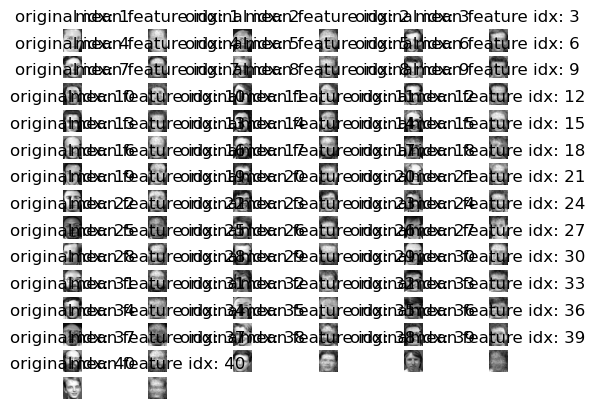

In [18]:

for i in range(len(recons_train_data)):
    title = f'original idx: {person_idxs[i]}'
    plt.subplot(rows, cols, i*2+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(test_imgs[i],'gray')

    title = f'mean feature idx: {person_idxs[i]}'
    plt.subplot(rows, cols, i*2+2)
    plt.title(title)
    plt.axis('off')
    plt.imshow(recons_train_data[i].reshape(img_h, img_w),'gray')
plt.show()


In [19]:
#3-3) 각 사람의 test 이미지 pca feature와 사람별 mean feature 간의 코사인 유사도
test_data = np.array(test_imgs)
img_nums, img_h, img_w =  test_data.shape
test_data = test_data.reshape(img_nums, -1).T
test_data.shape #(2576, 40)

test_data_pca = eigen_vecs.T @ test_data
test_data_pca.shape #(300, 40)

person_mean_feature_T = np.array(person_mean_feature).T
person_mean_feature_T.shape #(300, 40)

(300, 40)

In [20]:
#코사인 유사도를 활용한 모델
#크기 1로 정규화
test_norm = np.linalg.norm(test_data_pca, axis=0)
test_norm = np.repeat(test_norm[None, :], k, axis=0)
test_norm.shape #(300, 40)
test_data_pca_norm = test_data_pca / test_norm

mean_norm = np.linalg.norm(person_mean_feature_T, axis=0)
mean_norm = np.repeat(mean_norm[None, :], k, axis=0)
mean_norm.shape #(300, 40)
person_mean_feature_norm = person_mean_feature_T / mean_norm

cos_sim = test_data_pca_norm.T @ person_mean_feature_norm
cos_sim.shape #(40, 40)
idx_pred = {i : cos_sim[i, :].argmax() for i in range(img_nums)}  #행별 유사도가 가장 큰 인덱스 
print("test 데이터 사람 인덱스별 모델의 예측값 : \n", idx_pred)

test 데이터 사람 인덱스별 모델의 예측값 : 
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 8, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39}


In [21]:

#성능 평가 지표 : 정확도
sim_eval = [1 if target==pred else 0 for target, pred in idx_pred.items()]
acc = sum(sim_eval) / len(sim_eval) * 100
print(f"테스트 데이터 {img_nums}개의 모델 정확도 : {acc:.1f}%")



테스트 데이터 40개의 모델 정확도 : 97.5%


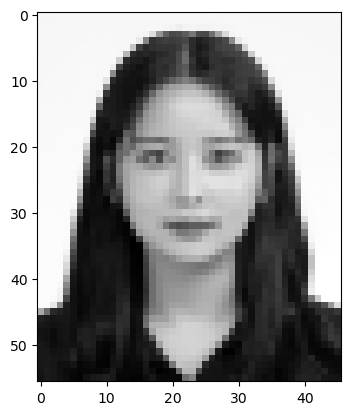

(56, 46)


In [29]:
#4) 자신의 얼굴 이미지에 대해, 앞서 방법으로 40명의 사람 중 자신과 가장 닮은 사람을
# 찾아서 표시하시오.
img = Image.open('./황지현_증명.png')
img_gray = img.convert("L")
img_gray=np.array(img_gray)
plt.imshow(img_gray, 'gray')
plt.show()
print(img_gray.shape)
img_gray = img_gray.reshape(-1, 1)


In [30]:

def get_idx_from_db(test_data, eigen_vecs, mean_feature_norm_db) :
    #pca 차원축소
    test_pca = eigen_vecs.T @ test_data 
    #표준화
    test_norm = np.linalg.norm(test_pca, axis=0) 
    test_norm = np.repeat(test_norm[None, :], test_pca.shape[0], axis=0)
    test_pca_norm = test_pca / test_norm

    cos_sim = test_pca_norm.T @ mean_feature_norm_db
    idx_pred = {i : cos_sim[i, :].argmax() for i in range(test_pca.shape[1])}
    return idx_pred


In [31]:
 
pred = get_idx_from_db(img_gray, eigen_vecs, person_mean_feature_norm)
print("예측 결과 : ", pred)

예측 결과 :  {0: 4}


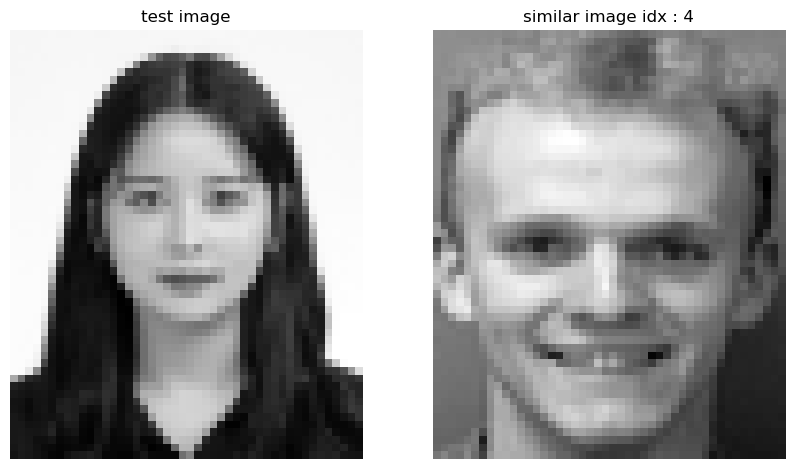

In [32]:
#시각화
plt.figure(figsize=(10, 20))
cols = 2
rows = 1

title = f'test image'
plt.subplot(rows, cols, 1)
plt.title(title)
plt.axis('off')
plt.imshow(img_gray.reshape(img_h, img_w), 'gray')

title = f'similar image idx : {pred[0]}'
plt.subplot(rows, cols, 2)
plt.title(title)
plt.axis('off')
plt.imshow(test_imgs[pred[0]].reshape(img_h, img_w), 'gray')